In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
data = pd.read_excel('stockreturns.xlsx')  # Remove the trailing dot
print(data.head())

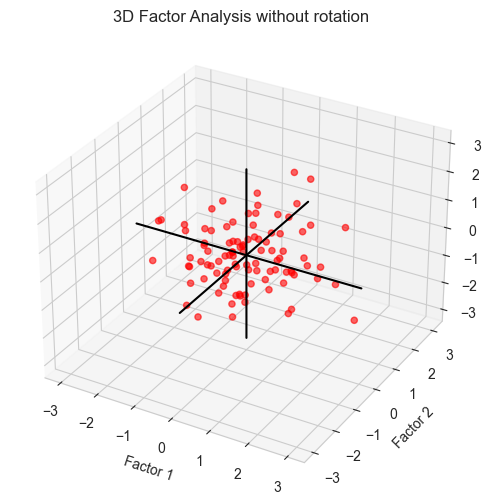

In [33]:
fa = FactorAnalysis(n_components=3, rotation=None)
df = fa.fit_transform(data)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df[:, 0], df[:, 1], df[:, 2], c='red', alpha=0.6)

ax.plot([-3, 3], [0, 0], [0, 0], 'k', linewidth=1.5)  # X-axis
ax.plot([0, 0], [-3, 3], [0, 0], 'k', linewidth=1.5)  # Y-axis
ax.plot([0, 0], [0, 0], [-3, 3], 'k', linewidth=1.5)  # Z-axis

ax.set_xlabel("Factor 1")
ax.set_ylabel("Factor 2")
ax.set_zlabel("Factor 3")
ax.set_title("3D Factor Analysis without rotation")

plt.show()



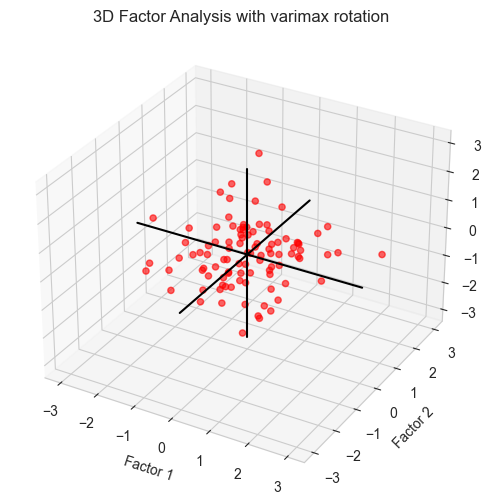

In [34]:
fa_rotation = FactorAnalysis(n_components=3, rotation='varimax')
fa_varimax = fa_rotation.fit_transform(data)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(fa_varimax[:, 0], fa_varimax[:, 1], fa_varimax[:, 2], c='red', alpha=0.6)

ax.plot([-3, 3], [0, 0], [0, 0], 'k', linewidth=1.5)  # X-axis
ax.plot([0, 0], [-3, 3], [0, 0], 'k', linewidth=1.5)  # Y-axis
ax.plot([0, 0], [0, 0], [-3, 3], 'k', linewidth=1.5)  # Z-axis

ax.set_xlabel("Factor 1")
ax.set_ylabel("Factor 2")
ax.set_zlabel("Factor 3")
ax.set_title("3D Factor Analysis with varimax rotation")

plt.show()

In [35]:
loadings_no_rotation = fa.components_
loadings_varimax = fa_rotation.components_

print(loadings_no_rotation)
print(loadings_varimax)

[[-0.85641381 -0.86561402 -0.49305594 -0.66905634 -0.69300744 -0.70355716
  -0.27756137 -0.71573743 -0.317018   -0.20704296]
 [ 0.28273104  0.57390563  0.48705206  0.27630341 -0.58432694 -0.79590577
  -0.89918242  0.28321684  0.80066679  0.34121277]
 [ 0.32377903  0.14832849  0.13829225  0.57278204 -0.14005506 -0.03395648
  -0.12827291 -0.46237717 -0.65788203 -0.79432802]]
[[-0.92716973 -0.96718807 -0.6455321  -0.91020951 -0.20434994 -0.1773531
   0.23421917 -0.42195554 -0.24015957  0.10485756]
 [-0.2060932  -0.01619087  0.1282891  -0.05302245 -0.89076728 -1.04300273
  -0.89754663 -0.28207007  0.31849779 -0.00887874]
 [-0.1268708  -0.40613021 -0.25744677  0.14410583 -0.07802217  0.10150316
   0.20389876 -0.74072565 -1.00760063 -0.88270946]]


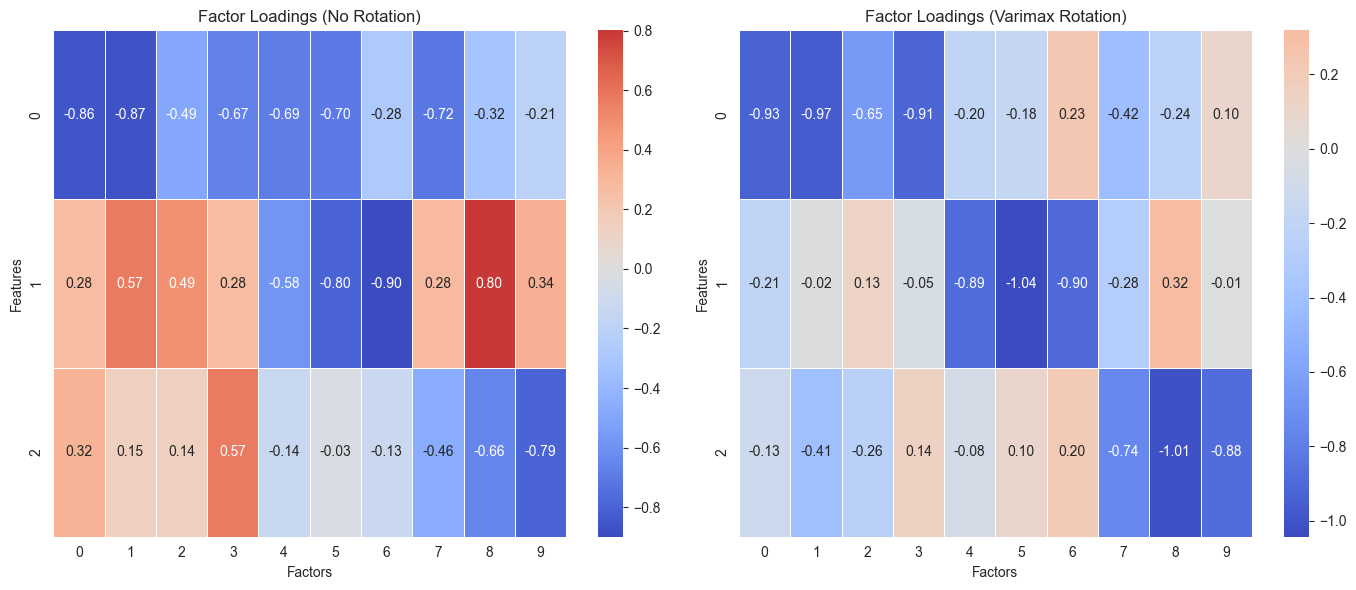

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap for non-rotated loadings
sns.heatmap(loadings_no_rotation, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=0.5, ax=ax[0])
ax[0].set_title("Factor Loadings (No Rotation)")
ax[0].set_xlabel("Factors")
ax[0].set_ylabel("Features")

# Heatmap for varimax-rotated loadings
sns.heatmap(loadings_varimax, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=0.5, ax=ax[1])
ax[1].set_title("Factor Loadings (Varimax Rotation)")
ax[1].set_xlabel("Factors")
ax[1].set_ylabel("Features")

plt.tight_layout()
plt.show()

Rotation: None | Original shape: (99, 3) | Filtered shape: (36, 3)
Rotation: varimax | Original shape: (99, 3) | Filtered shape: (40, 3)
Rotation: quartimax | Original shape: (99, 3) | Filtered shape: (39, 3)


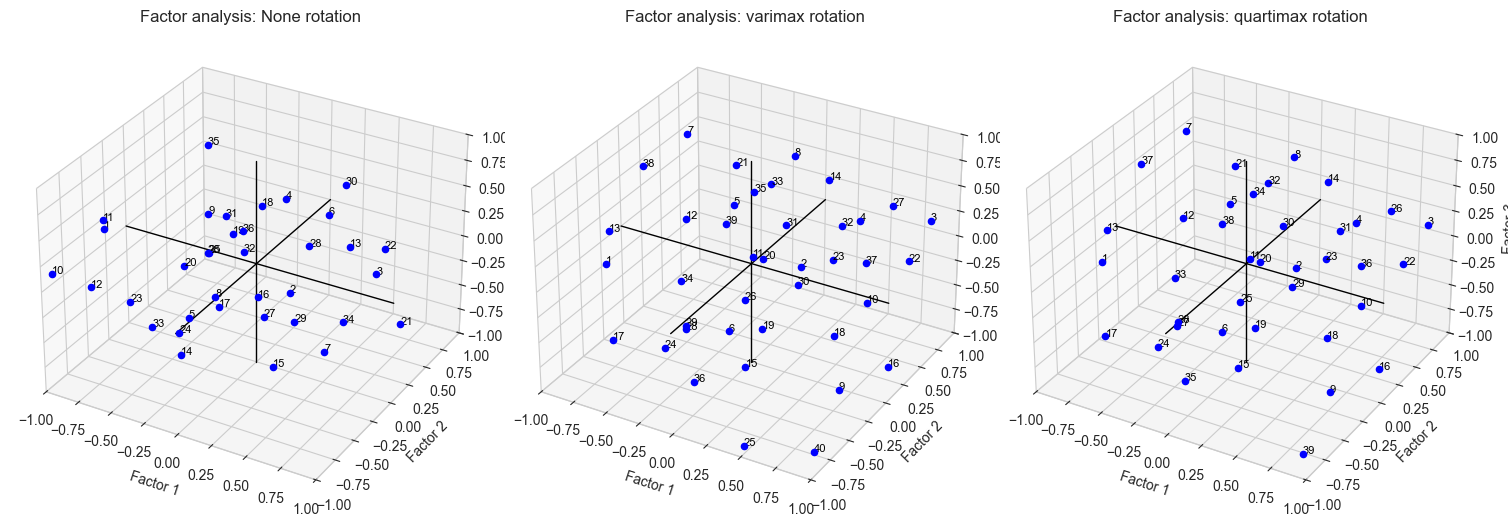

In [37]:
rotations = [None, 'varimax', 'quartimax']

fig = plt.figure(figsize=(15, 6))

for i, rotation in enumerate(rotations):

    fa = FactorAnalysis(n_components=3, rotation= rotation)
    df_transformed = fa.fit_transform(data)

    df_transformed = pd.DataFrame(df_transformed, columns=["Factor 1", "Factor 2", "Factor 3"])

    # Filter: Keep only rows where all values are between -1 and 1
    df_filtered = df_transformed[(df_transformed.abs() <= 1).all(axis=1)]

    print(f"Rotation: {rotation} | Original shape: {df_transformed.shape} | Filtered shape: {df_filtered.shape}")

    # 3D Plot for filtered data
    ax = fig.add_subplot(1, 3, i+1, projection='3d')

    # Scatter plot with index labels
    for j in range(df_filtered.shape[0]):
        ax.scatter(df_filtered.iloc[j, 0], df_filtered.iloc[j, 1], df_filtered.iloc[j, 2], color='blue')
        ax.text(df_filtered.iloc[j, 0], df_filtered.iloc[j, 1], df_filtered.iloc[j, 2], str(j+1), color='black', fontsize=8)

    # Draw axis lines at the origin
    ax.plot([-1, 1], [0, 0], [0, 0], 'k', linewidth=1)  # X-axis
    ax.plot([0, 0], [-1, 1], [0, 0], 'k', linewidth=1)  # Y-axis
    ax.plot([0, 0], [0, 0], [-1, 1], 'k', linewidth=1)  # Z-axis

    # Labels and title
    ax.set_xlabel("Factor 1")
    ax.set_ylabel("Factor 2")
    ax.set_zlabel("Factor 3")
    ax.set_title(f"Factor analysis: {rotation} rotation")

    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])

plt.tight_layout()
plt.show()

In [38]:
import yfinance as yf
import pandas as pd
import numpy as np

tickers = ["ABB.ST", "SAAB-B.ST", "VOLV-B.ST", "ATCO-A.ST",
           "NCC-B.ST", "JM.ST", "SKA-B.ST",
           "SEB-A.ST", "NDA-SE.ST", "SHB-A.ST"]

# Download stock data
stock_data = yf.download(tickers, period="1mo", interval="1d")
print(stock_data.head())


/Users/mdarifulamin/PycharmProjects/EDA Lab made by sakshi/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  10 of 10 completed

Price            Close                                                  \
Ticker          ABB.ST   ATCO-A.ST       JM.ST    NCC-B.ST   NDA-SE.ST   
Date                                                                     
2025-01-24  650.599976  192.399994  175.699997  180.000000  132.850006   
2025-01-27  619.000000  186.899994  177.899994  179.300003  133.399994   
2025-01-28  608.599976  180.399994  176.300003  179.300003  133.100006   
2025-01-29  618.799988  182.050003  179.699997  179.000000  132.699997   
2025-01-30  606.599976  184.000000  183.500000  180.300003  134.050003   

Price                                                                   ...  \
Ticker       SAAB-B.ST    SEB-A.ST    SHB-A.ST    SKA-B.ST   VOLV-B.ST  ...   
Date                                                                    ...   
2025-01-24  233.800003  165.250000  123.300003  244.699997  293.299988  ...   
2025-01-27  232.750000  165.250000  123.300003  234.699997  292.000000  ...   
2025-01-28  

In [39]:
stock_data = stock_data.tail(20)# Calculate daily percentage returns
returns = stock_data.pct_change().dropna()
print(returns)
stock_data = returns

Price          Close                                                    \
Ticker        ABB.ST ATCO-A.ST     JM.ST  NCC-B.ST NDA-SE.ST SAAB-B.ST   
Date                                                                     
2025-01-29  0.016760  0.009146  0.019285 -0.001673 -0.003005  0.005613   
2025-01-30 -0.019716  0.010711  0.021146  0.007263  0.010173  0.007299   
2025-01-31  0.000989  0.011957 -0.101907 -0.006101 -0.016412  0.024936   
2025-02-03 -0.017457 -0.017186 -0.026699 -0.002790 -0.013273  0.011853   
2025-02-04  0.001006  0.012022  0.029925  0.003917 -0.011914 -0.023222   
2025-02-05 -0.009712 -0.002160 -0.000605 -0.002230 -0.006612  0.002735   
2025-02-06  0.007778  0.008929  0.006057  0.027374  0.025450 -0.045321   
2025-02-07  0.001678 -0.015017 -0.022878  0.001088  0.000000 -0.061978   
2025-02-10  0.004355  0.010074  0.019100 -0.024986 -0.002673  0.022024   
2025-02-11  0.003669 -0.004852 -0.025998  0.016156  0.014931  0.000917   
2025-02-12  0.000997  0.002979 -0.0080

In [40]:
print(stock_data.columns)

MultiIndex([( 'Close',    'ABB.ST'),
            ( 'Close', 'ATCO-A.ST'),
            ( 'Close',     'JM.ST'),
            ( 'Close',  'NCC-B.ST'),
            ( 'Close', 'NDA-SE.ST'),
            ( 'Close', 'SAAB-B.ST'),
            ( 'Close',  'SEB-A.ST'),
            ( 'Close',  'SHB-A.ST'),
            ( 'Close',  'SKA-B.ST'),
            ( 'Close', 'VOLV-B.ST'),
            (  'High',    'ABB.ST'),
            (  'High', 'ATCO-A.ST'),
            (  'High',     'JM.ST'),
            (  'High',  'NCC-B.ST'),
            (  'High', 'NDA-SE.ST'),
            (  'High', 'SAAB-B.ST'),
            (  'High',  'SEB-A.ST'),
            (  'High',  'SHB-A.ST'),
            (  'High',  'SKA-B.ST'),
            (  'High', 'VOLV-B.ST'),
            (   'Low',    'ABB.ST'),
            (   'Low', 'ATCO-A.ST'),
            (   'Low',     'JM.ST'),
            (   'Low',  'NCC-B.ST'),
            (   'Low', 'NDA-SE.ST'),
            (   'Low', 'SAAB-B.ST'),
            (   'Low',  'SEB-A.ST'),
 

In [41]:
stock_data = stock_data['Close']

In [42]:
with open("stock_returns.txt", "w") as f:
    f.write("Date\t" + "\t".join(stock_data.columns) + "\n")
    
    for date, row in zip(stock_data.index, stock_data.values):
        f.write(f"{date}\t" + "\t".join(map(lambda x: f"{x:.2f}", row)) + "\n")

In [43]:
stock_data.to_csv('stock_returns.csv', index=False)

In [44]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2, rotation='varimax')
factors = fa.fit_transform(stock_data)

factor_loadings = pd.DataFrame(fa.components_, columns=stock_data.columns)
print("Factor Loadings (Varimax Rotation):")
factor_loadings.to_csv('factor_loadings.csv', index=False)
factor_loadings


Factor Loadings (Varimax Rotation):


Ticker,ABB.ST,ATCO-A.ST,JM.ST,NCC-B.ST,NDA-SE.ST,SAAB-B.ST,SEB-A.ST,SHB-A.ST,SKA-B.ST,VOLV-B.ST
0,0.007129,0.005861,0.017269,0.005274,0.004627,0.000941,-0.002982,0.002787,0.005215,0.019401
1,0.002052,0.002161,0.006444,0.006921,0.008387,0.002834,0.013267,0.003425,-0.000470,-0.004086


In [45]:
max_values = factor_loadings.iloc[:, :].max() 
max_rows = factor_loadings.iloc[:, :].idxmax()

for col, val, idx in zip(factor_loadings.columns[:], max_values, max_rows):
    print(f"Column {col}: Max Value = {val:.2f}, Row = {idx}")

Column ABB.ST: Max Value = 0.01, Row = 0
Column ATCO-A.ST: Max Value = 0.01, Row = 0
Column JM.ST: Max Value = 0.02, Row = 0
Column NCC-B.ST: Max Value = 0.01, Row = 1
Column NDA-SE.ST: Max Value = 0.01, Row = 1
Column SAAB-B.ST: Max Value = 0.00, Row = 1
Column SEB-A.ST: Max Value = 0.01, Row = 1
Column SHB-A.ST: Max Value = 0.00, Row = 1
Column SKA-B.ST: Max Value = 0.01, Row = 0
Column VOLV-B.ST: Max Value = 0.02, Row = 0


In [46]:
factor_loadings.to_csv('factor_loadings.csv', index=False)

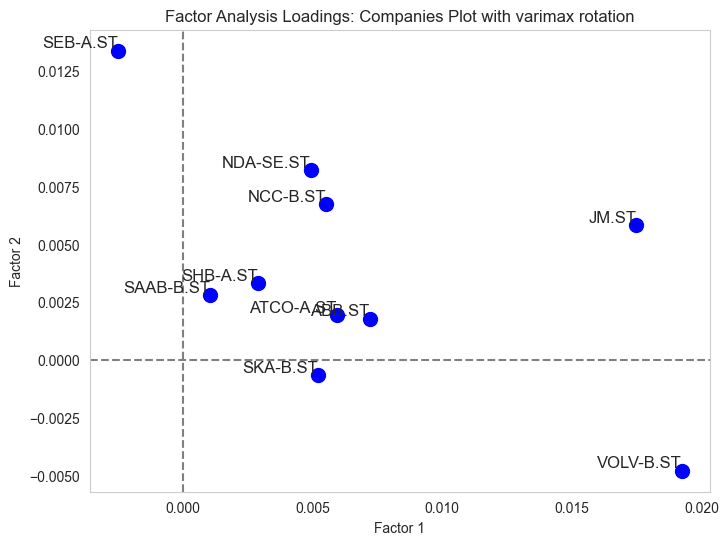

In [53]:
import matplotlib.pyplot as plt

# Extract Factor 1 and Factor 2 from factor_loadings DataFrame
factor_1 = factor_loadings.iloc[0]  # First row (Factor 1)
factor_2 = factor_loadings.iloc[1]  # Second row (Factor 2)

# Plot factor loadings
plt.figure(figsize=(8, 6))
plt.scatter(factor_1, factor_2, color='b', s=100)

# Add company labels
for company, x, y in zip(factor_loadings.columns, factor_1, factor_2):
    plt.text(x, y, company, fontsize=12, ha='right', va='bottom')

# Formatting
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("Factor Analysis Loadings: Companies Plot with varimax rotation")
plt.grid()
plt.show()


In [48]:
fa = FactorAnalysis(n_components=2, rotation=None)
factors = fa.fit_transform(stock_data)

# Print Factor Loadings
factor_loadings1 = pd.DataFrame(fa.components_, columns=stock_data.columns)
print("Factor Loadings (Without Rotation):")
factor_loadings1

Factor Loadings (Without Rotation):


Ticker,ABB.ST,ATCO-A.ST,JM.ST,NCC-B.ST,NDA-SE.ST,SAAB-B.ST,SEB-A.ST,SHB-A.ST,SKA-B.ST,VOLV-B.ST
0,0.004793,0.003678,0.010794,0.000550,-0.000802,-0.000789,-0.009840,0.000419,0.004600,0.018409
1,0.005661,0.005049,0.014940,0.008684,0.009545,0.002880,0.009386,0.004395,0.002501,0.007361


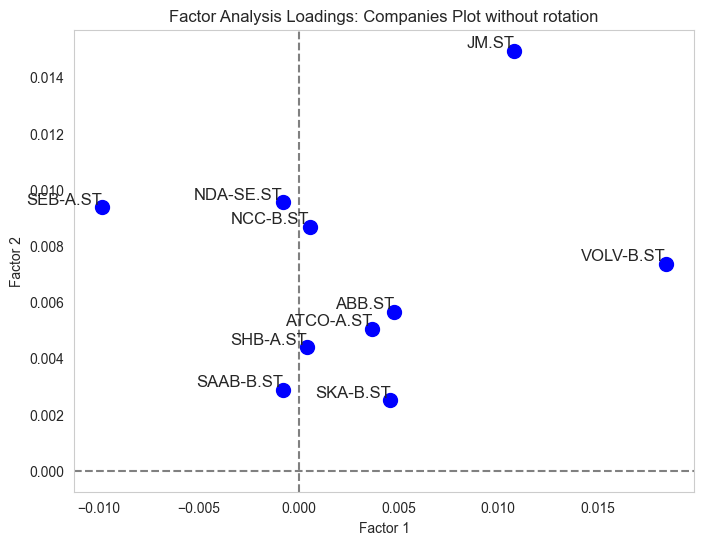

In [52]:
# Extract Factor 1 and Factor 2 from factor_loadings DataFrame
factor_1 = factor_loadings1.iloc[0]  # First row (Factor 1)
factor_2 = factor_loadings1.iloc[1]  # Second row (Factor 2)

# Plot factor loadings
plt.figure(figsize=(8, 6))
plt.scatter(factor_1, factor_2, color='b', s=100)

# Add company labels
for company, x, y in zip(factor_loadings1.columns, factor_1, factor_2):
    plt.text(x, y, company, fontsize=12, ha='right', va='bottom')

# Formatting
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("Factor Analysis Loadings: Companies Plot without rotation")
plt.grid()
plt.show()

In [50]:
fa = FactorAnalysis(n_components=2, rotation='quartimax')
factors = fa.fit_transform(stock_data)

# Print Factor Loadings
factor_loadings = pd.DataFrame(fa.components_, columns=stock_data.columns)
print("Factor Loadings (Varimax Rotation):")
factor_loadings

Factor Loadings (Varimax Rotation):


Ticker,ABB.ST,ATCO-A.ST,JM.ST,NCC-B.ST,NDA-SE.ST,SAAB-B.ST,SEB-A.ST,SHB-A.ST,SKA-B.ST,VOLV-B.ST
0,0.007198,0.005935,0.017490,0.005521,0.004927,0.001042,-0.002500,0.002909,0.005194,0.019240
1,0.001793,0.001948,0.005815,0.006726,0.008214,0.002798,0.013367,0.003322,-0.000659,-0.004785


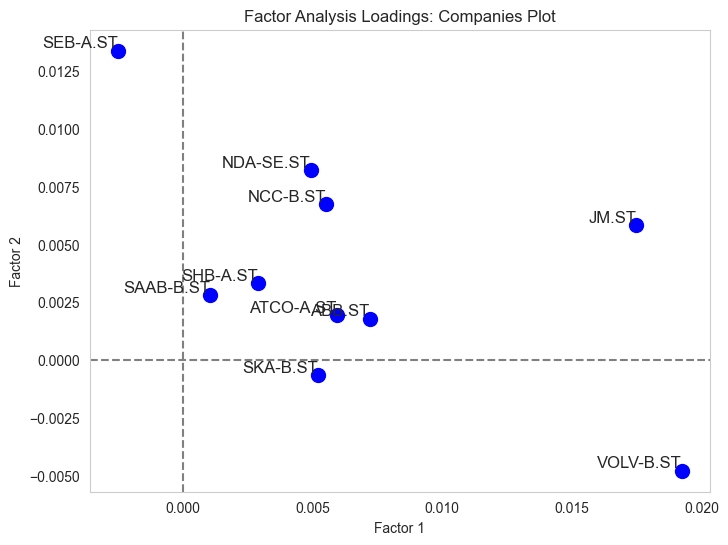

In [51]:
# Extract Factor 1 and Factor 2 from factor_loadings DataFrame
factor_1 = factor_loadings.iloc[0]  # First row (Factor 1)
factor_2 = factor_loadings.iloc[1]  # Second row (Factor 2)

# Plot factor loadings
plt.figure(figsize=(8, 6))
plt.scatter(factor_1, factor_2, color='b', s=100)

# Add company labels
for company, x, y in zip(factor_loadings.columns, factor_1, factor_2):
    plt.text(x, y, company, fontsize=12, ha='right', va='bottom')

# Formatting
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("Factor Analysis Loadings: Companies Plot")
plt.grid()
plt.show()